In [1]:
# import necessary libraries
import numpy as np # computations
import pandas as pd # manipulation and analysis
import matplotlib.pyplot as plt # visualization
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.model_selection import train_test_split # splitting dataset

In [2]:
# load the dataset into a pandas DataFrame
df = pd.read_csv("seeds_dataset.txt", delimiter="\t", header=None, 
                 names=['area', 'perimeter', 'compactness', 'kernal length', 
                        'kernel width', 'asymmetry coefficient', 'kernel groove length', 'variety'])

print(df.head()) # test opening the file

# split the dataset into input features and target variable with 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(df[['area', 'perimeter', 'compactness', 
                                                        'kernal length', 'kernel width', 'asymmetry coefficient', 
                                                        'kernel groove length']],
                                                    df['variety'],
                                                    test_size=0.2)

    area  perimeter  compactness  kernal length  kernel width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   asymmetry coefficient  kernel groove length  variety  
0                  2.221                 5.220        1  
1                  1.018                 4.956        1  
2                  2.699                 4.825        1  
3                  2.259                 4.805        1  
4                  1.355                 5.175        1  


In [3]:
# create instance of the KNN classifier with 3 neighbors
classifier = KNeighborsClassifier(n_neighbors=3)

# train KNN classifier using the training dataset
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
# make predictions on the test dataset using the trained KNN classifier
prediction = classifier.predict(X_test)

# calculate the number of correct predictions
correct = np.where(prediction == y_test, 1, 0).sum()

# print the total number of correct predictions
print(correct)

36


In [5]:
# calculate accuracy of the model
accuracy = correct / len(y_test)

# print the calculated accuracy
print('accuracy', accuracy) 

accuracy 0.8571428571428571


k = 1   Accuracy = 0.8809523809523809
k = 3   Accuracy = 0.8571428571428571
k = 5   Accuracy = 0.9285714285714286
k = 7   Accuracy = 0.9285714285714286
k = 9   Accuracy = 0.9047619047619048
k = 11   Accuracy = 0.9047619047619048
k = 13   Accuracy = 0.8571428571428571
k = 15   Accuracy = 0.8809523809523809
k = 17   Accuracy = 0.8809523809523809
k = 19   Accuracy = 0.8809523809523809
k = 21   Accuracy = 0.8809523809523809
k = 23   Accuracy = 0.8809523809523809
k = 25   Accuracy = 0.9047619047619048
k = 27   Accuracy = 0.8809523809523809
k = 29   Accuracy = 0.9047619047619048
k = 31   Accuracy = 0.9047619047619048
k = 33   Accuracy = 0.8809523809523809
k = 35   Accuracy = 0.8809523809523809
k = 37   Accuracy = 0.8809523809523809
k = 39   Accuracy = 0.8809523809523809
k = 41   Accuracy = 0.8809523809523809
k = 43   Accuracy = 0.8809523809523809
k = 45   Accuracy = 0.8809523809523809
k = 47   Accuracy = 0.8809523809523809
k = 49   Accuracy = 0.8809523809523809


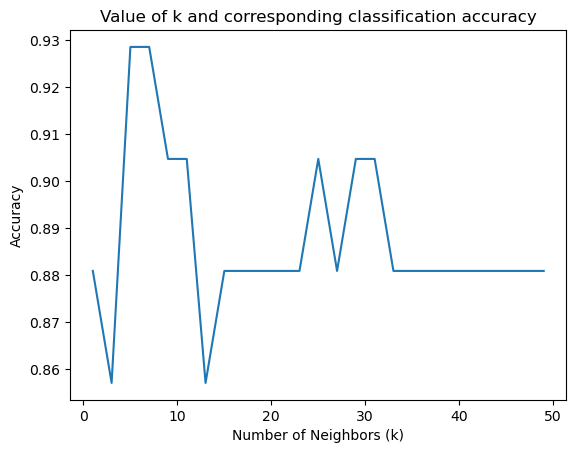

In [6]:
# initialize an empty list to store accuracy results for different values of k
results = []

# loop over k values from 1 to 50 to find best k for classifier (skipping even numbers)
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction == y_test, 1, 0).sum() / len(y_test)
    print(f'k = {k}   Accuracy = {accuracy}')
    results.append([k, accuracy]) # store k and accuracy in results

# convert results list to a DataFrame for graphing purposes
results = pd.DataFrame(results, columns=['k', 'accuracy'])

# plot the accuracy values against differnt values of k visualizing choice of k impacting model performance
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

# After training and testing the model multiple times, it looks like the accuracy does vary in accuracy.
# However, most of the time the higher accuracies come from k values 21 and greater. Sometimes, the same
# high scores from large k values are seen in the low k ranges, usually somewhere around 5-11.